In [25]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [40]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts
                           , random_state=123
                           , centers=centers
                           , cluster_std=0.4)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))
print(y.shape)

(100,)


In [27]:
X[0:5]

array([[-0.13715792, -0.07147228],
       [ 0.80437976, -0.37061246],
       [-0.60224775, -0.61943564],
       [ 0.57087693, -0.5119872 ],
       [ 0.0063745 ,  0.15330384]])

In [28]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])

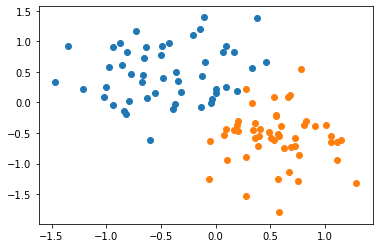

In [29]:
scatter_plot()

In [31]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__() 
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [41]:
torch.manual_seed(2)
model = Model(2, 1)
#print(list(model.parameters()))

In [33]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
def get_params():
    return (w1.item(), w2.item(), b[0].item())

In [36]:
def plot_fit(title, points = [-2,2]):
    plt.title = title
    w1, w2, b1 = get_params()
    x1 = np.array(points)
    x2 = (w1*x1 + b1)/(-w2)
    plt.plot(x1, x2, 'r')
    scatter_plot()
    plt.show()

Note that the line is drawn by finding out second coordinate 
when first coordinate is available to us.

The formula for straight line w1x1 + b will give the point 2 when x1 is provided.
And to draw a straight line we need x2, which is derived from the formula used above
point -2 , 2 are taken randomly which are one coordinate of a point
they can be taken anything here e.g -1, 1

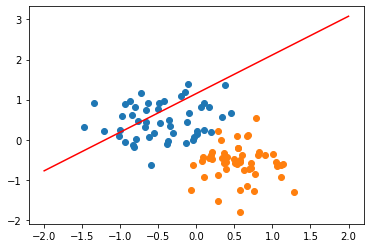

In [37]:
plot_fit('Initial Model')

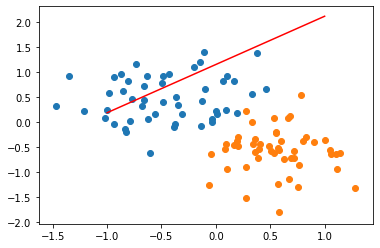

In [39]:
plot_fit('Initial Model', points =[-1, 1])

In [18]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [21]:
epochs = 500
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    if (i%20 == 0): 
        print("epoch:", i, "loss:", loss.item())
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 loss: 0.5289824604988098
epoch: 20 loss: 0.5142462849617004
epoch: 40 loss: 0.5003856420516968
epoch: 60 loss: 0.487334668636322
epoch: 80 loss: 0.4750322997570038
epoch: 100 loss: 0.46342259645462036
epoch: 120 loss: 0.4524537920951843
epoch: 140 loss: 0.44207894802093506
epoch: 160 loss: 0.43225470185279846
epoch: 180 loss: 0.42294082045555115
epoch: 200 loss: 0.41410133242607117
epoch: 220 loss: 0.40570273995399475
epoch: 240 loss: 0.3977143168449402
epoch: 260 loss: 0.3901081383228302
epoch: 280 loss: 0.3828583061695099
epoch: 300 loss: 0.37594103813171387
epoch: 320 loss: 0.3693346679210663
epoch: 340 loss: 0.3630191683769226
epoch: 360 loss: 0.3569760024547577
epoch: 380 loss: 0.3511882424354553
epoch: 400 loss: 0.34564027190208435
epoch: 420 loss: 0.3403174877166748
epoch: 440 loss: 0.33520644903182983
epoch: 460 loss: 0.3302949070930481
epoch: 480 loss: 0.32557129859924316


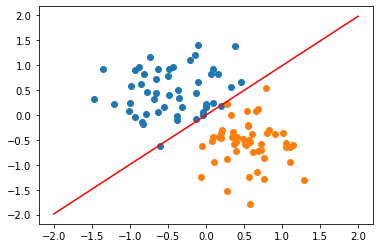

In [22]:
plot_fit("Trained Model")